In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
# Load datasets
covid_df = pd.read_csv(r"C:\Users\gagan\OneDrive\Desktop\Covid-19 Data Analysis\Dataset\covid_19_india.csv")
vaccine_df = pd.read_csv(r"C:\Users\gagan\OneDrive\Desktop\Covid-19 Data Analysis\Dataset\covid_vaccine_statewise.csv")

In [3]:
# Display the first few rows of the COVID data
covid_df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0  1.0  2020-01-30  6:00 PM               Kerala                       1   
1  2.0  2020-01-31  6:00 PM               Kerala                       1   
2  3.0  2020-02-01  6:00 PM               Kerala                       2   
3  4.0  2020-02-02  6:00 PM               Kerala                       3   
4  5.0  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0

In [4]:
# Drop unnecessary columns from the COVID data
covid_df.drop(columns=['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True)

In [5]:
# Display the first few rows after dropping columns
covid_df.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0  2020-01-30               Kerala    0.0     0.0        1.0
1  2020-01-31               Kerala    0.0     0.0        1.0
2  2020-02-01               Kerala    0.0     0.0        2.0
3  2020-02-02               Kerala    0.0     0.0        3.0
4  2020-02-03               Kerala    0.0     0.0        3.0

In [6]:
# Calculate active cases
covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

In [7]:
# Display data info to confirm changes
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  15086 non-null  object 
 1   State/UnionTerritory  15086 non-null  object 
 2   Cured                 15086 non-null  float64
 3   Deaths                15086 non-null  float64
 4   Confirmed             15086 non-null  float64
 5   Active_cases          15086 non-null  float64
dtypes: float64(4), object(2)
memory usage: 708.6+ KB


In [8]:
# Convert 'Date' column to datetime format
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [9]:
# Display updated data info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  15086 non-null  datetime64[ns]
 1   State/UnionTerritory  15086 non-null  object        
 2   Cured                 15086 non-null  float64       
 3   Deaths                15086 non-null  float64       
 4   Confirmed             15086 non-null  float64       
 5   Active_cases          15086 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 708.6+ KB


In [10]:
# Create a pivot table for state-wise COVID data
statewise = pd.pivot_table(covid_df, values=['Confirmed', 'Cured', 'Deaths'], index='State/UnionTerritory', aggfunc=max)

# Calculate recovery and mortality rates
statewise['Recovery Rate'] = (statewise['Cured'] * 100) / statewise['Confirmed']
statewise['Mortality Rate'] = (statewise['Deaths'] * 100) / statewise['Confirmed']

# Sort states by the number of confirmed cases
statewise = statewise.sort_values('Confirmed', ascending=False)

# Apply a color gradient to the pivot table for better visualization
statewise.style.background_gradient(cmap='cubehelix')

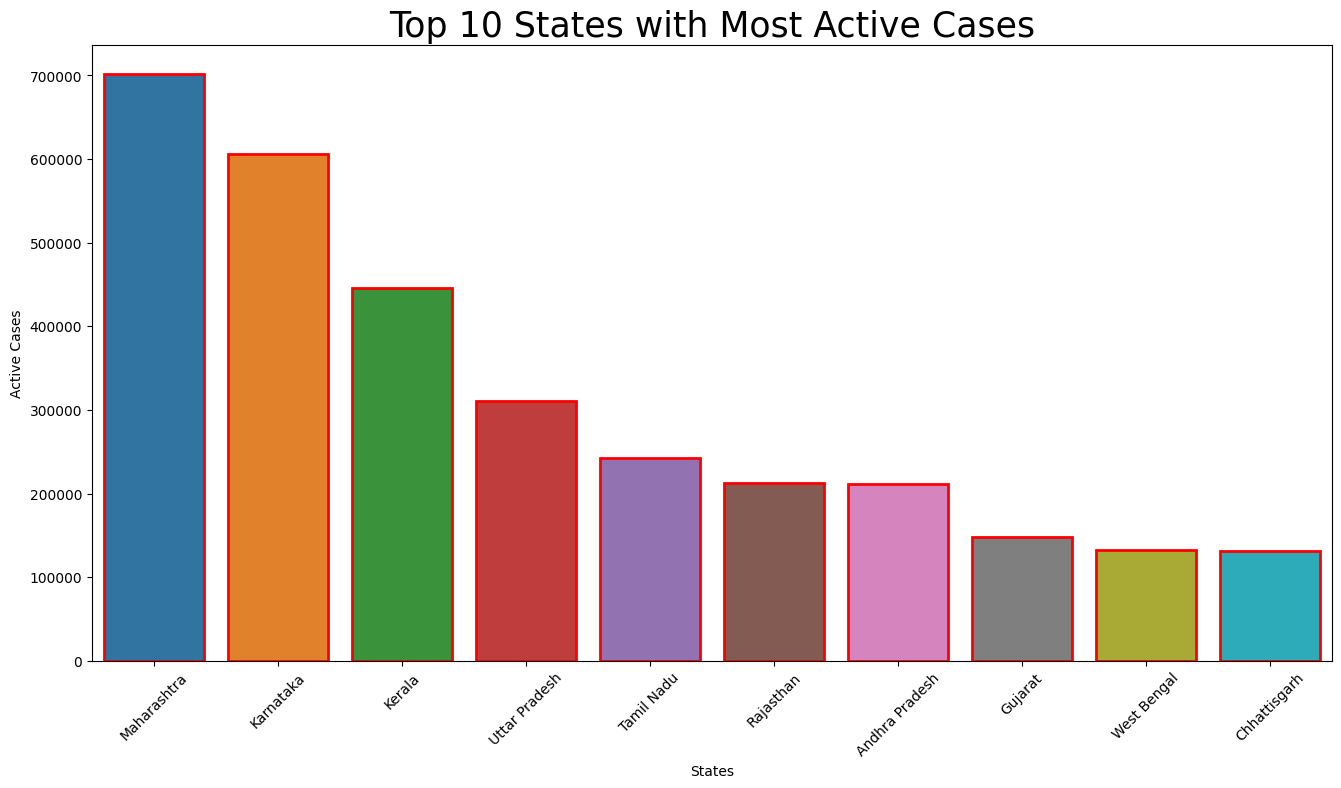

In [11]:
# Find the top 10 states with the highest number of active cases
top_10_active_cases = covid_df.groupby('State/UnionTerritory')[['Active_cases', 'Date']].max().sort_values('Active_cases', ascending=False).reset_index()

# Plot the top 10 states with the most active cases
plt.figure(figsize=(16, 8))
sns.barplot(data=top_10_active_cases.head(10), x='State/UnionTerritory', y='Active_cases', linewidth=2, edgecolor='red')
plt.title("Top 10 States with Most Active Cases", size=25)
plt.xlabel("States")
plt.ylabel("Active Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

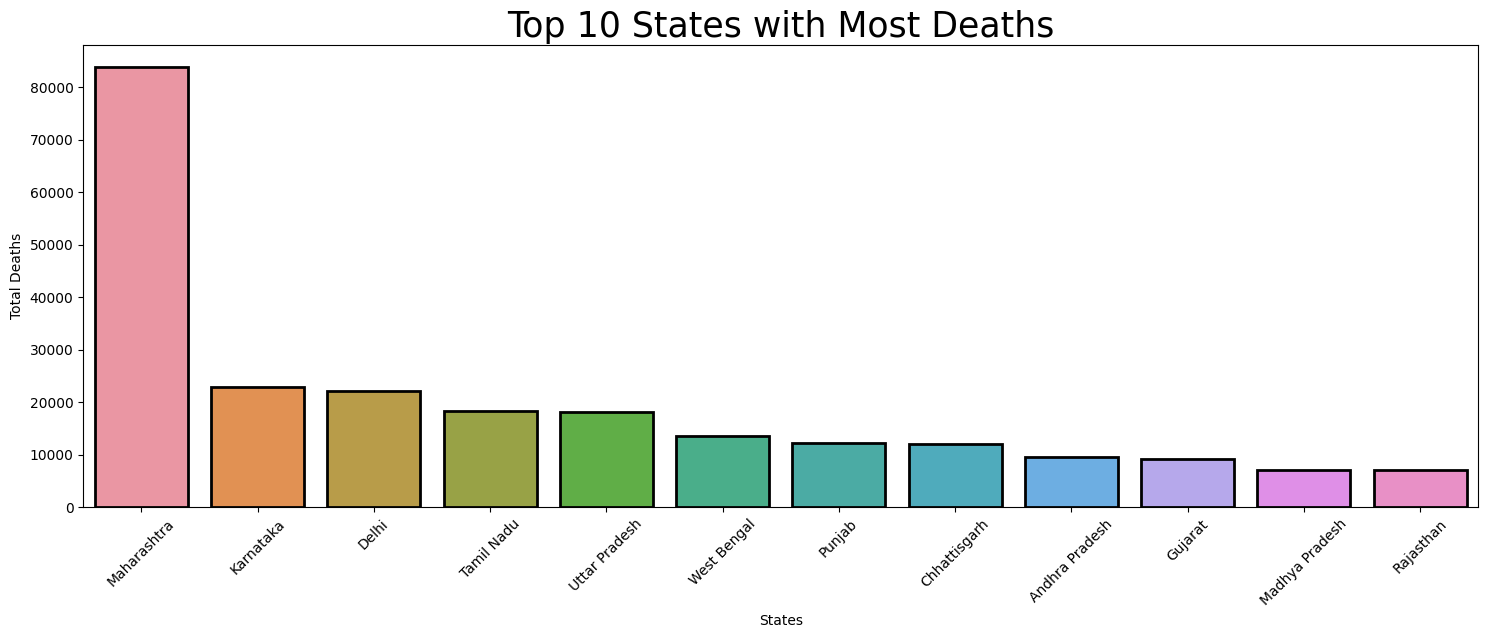

In [12]:
# Find the top 10 states with the highest number of deaths
top_10_deaths = covid_df.groupby('State/UnionTerritory')[['Deaths', 'Date']].max().sort_values('Deaths', ascending=False).reset_index()

# Plot the top 10 states with the most deaths
plt.figure(figsize=(18, 6))
sns.barplot(data=top_10_deaths.head(12), x='State/UnionTerritory', y='Deaths', linewidth=2, edgecolor='black')
plt.title("Top 10 States with Most Deaths", size=25)
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


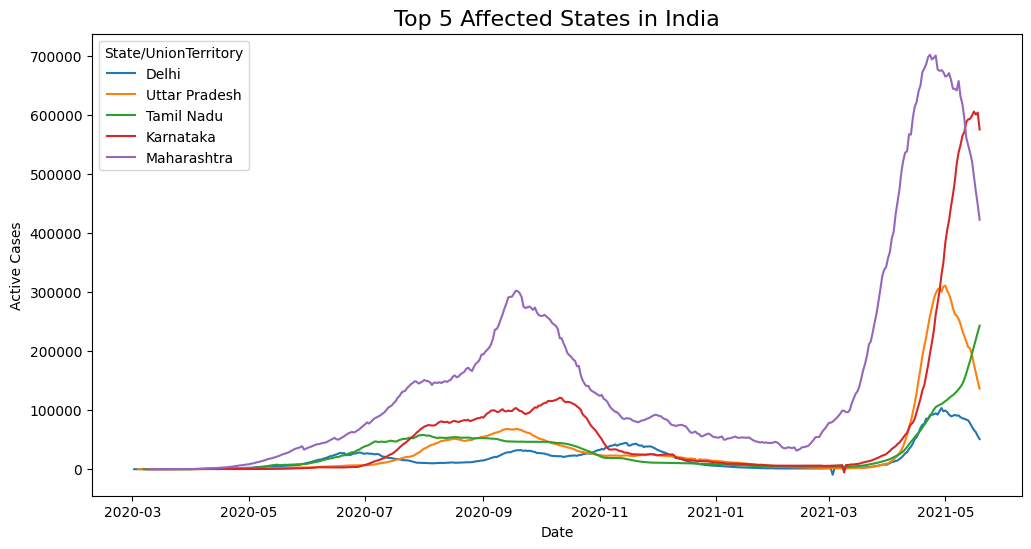

In [13]:
# Plot active cases trend for the top 5 affected states
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Delhi', 'Uttar Pradesh'])], x='Date', y='Active_cases', hue='State/UnionTerritory')
plt.title("Top 5 Affected States in India", size=16)
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()

In [14]:
# Display the first few rows of the vaccine data
vaccine_df.head()

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
0                                NaN                       23757.0   
1                                NaN                       27348.0   
2                                NaN                       41361.0   
3                                NaN                       81901.0   
4                                NaN                       98111.0   

   Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
0                         24517.0                                  2.0   
1                         31252.0                                  4.0   
2                         58083.0                                  5.0   
3                        113613.0                                 11.0   
4                        153145.0                                 24.0   

   Total Individuals Vaccinated  
0                       48276.0  
1                       58604.0  
2                       99449.0  
3                      195525.0  
4                      251280.0  

[5 rows x 24 columns]

In [15]:
# Filter out the invalid 'India' entry
vaccine_df = vaccine_df[vaccine_df['State'] != 'India']

In [16]:
# Display the first few rows after filtering
vaccine_df.head()

Updated On                        State  Total Doses Administered  \
212  16/01/2021  Andaman and Nicobar Islands                      23.0   
213  17/01/2021  Andaman and Nicobar Islands                      23.0   
214  18/01/2021  Andaman and Nicobar Islands                      42.0   
215  19/01/2021  Andaman and Nicobar Islands                      89.0   
216  20/01/2021  Andaman and Nicobar Islands                     124.0   

     Sessions   Sites   First Dose Administered  Second Dose Administered  \
212       2.0      2.0                     23.0                       0.0   
213       2.0      2.0                     23.0                       0.0   
214       9.0      2.0                     42.0                       0.0   
215      12.0      2.0                     89.0                       0.0   
216      16.0      3.0                    124.0                       0.0   

     Male (Doses Administered)  Female (Doses Administered)  \
212                       12.0                         11.0   
213                       12.0                         11.0   
214                       29.0                         13.0   
215                       53.0                         36.0   
216                       67.0                         57.0   

     Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                               0.0  ...                               NaN   
213                               0.0  ...                               NaN   
214                               0.0  ...                               NaN   
215                               0.0  ...                               NaN   
216                               0.0  ...                               NaN   

     45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                               NaN                             NaN   
213                               NaN                             NaN   
214                               NaN                             NaN   
215                               NaN                             NaN   
216                               NaN                             NaN   

     18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
212                                  NaN                                  NaN   
213                                  NaN                                  NaN   
214                                  NaN                                  NaN   
215                                  NaN                                  NaN   
216                                  NaN                                  NaN   

     60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
212                                NaN                           NaN   
213                                NaN                           NaN   
214                                NaN                           NaN   
215                                NaN                           NaN   
216                                NaN                           NaN   

     Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
212                             NaN                                  NaN   
213                             NaN                                  NaN   
214                             NaN                                  NaN   
215                             NaN                                  NaN   
216                             NaN                                  NaN   

     Total Individuals Vaccinated  
212                          23.0  
213                          23.0  
214                          42.0  
215                          89.0  
216                         124.0  

[5 rows x 24 columns]

In [17]:
vaccine = vaccine_df[['Updated On', 'State', 'Male (Doses Administered)', 'Female (Doses Administered)', 'Total Individuals Vaccinated']]

In [18]:
# Select and rename columns in the vaccine data
vaccine = vaccine_df[['Updated On', 'State', 'Male (Doses Administered)', 'Female (Doses Administered)', 'Total Individuals Vaccinated']].copy()
vaccine.rename(columns={'Updated On': 'Date', 'Total Individuals Vaccinated': 'Total'}, inplace=True)

# Display the first few rows of the updated vaccine data
vaccine.head()

Date                        State  Male (Doses Administered)  \
212  16/01/2021  Andaman and Nicobar Islands                       12.0   
213  17/01/2021  Andaman and Nicobar Islands                       12.0   
214  18/01/2021  Andaman and Nicobar Islands                       29.0   
215  19/01/2021  Andaman and Nicobar Islands                       53.0   
216  20/01/2021  Andaman and Nicobar Islands                       67.0   

     Female (Doses Administered)  Total  
212                         11.0   23.0  
213                         11.0   23.0  
214                         13.0   42.0  
215                         36.0   89.0  
216                         57.0  124.0

In [19]:
# Calculate total doses administered to males and females
males = vaccine['Male (Doses Administered)'].sum()
females = vaccine['Female (Doses Administered)'].sum()

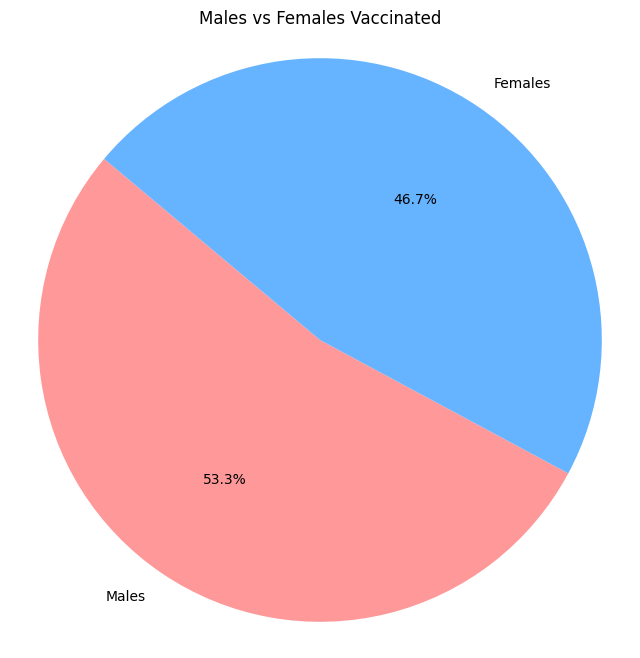

In [20]:
# Define labels and sizes for the pie chart
labels = ['Males', 'Females']
sizes = [males, females]
colors = ['#ff9999', '#66b3ff']

# Plot a pie chart for the vaccination distribution by gender
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Males vs Females Vaccinated')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

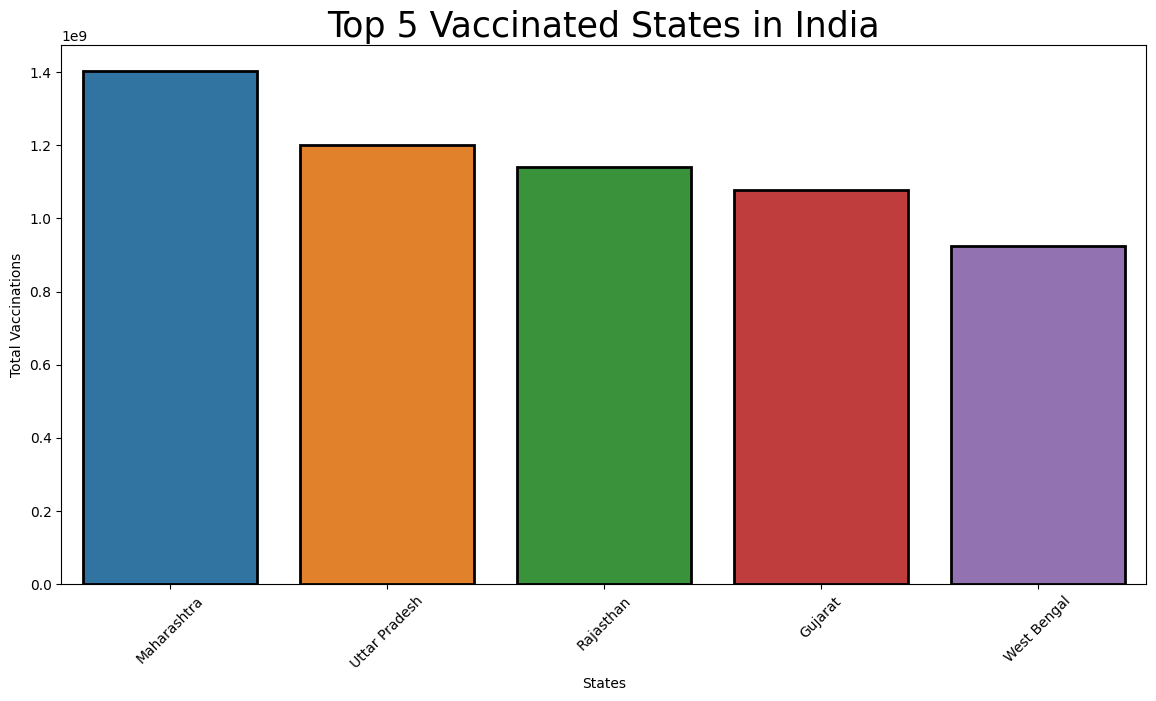

In [21]:
# Find the top 5 states with the highest total vaccination
top_5_vac_states = vaccine.groupby('State')[['Total', 'Date']].sum().sort_values('Total', ascending=False).reset_index()

# Plot the top 5 vaccinated states
plt.figure(figsize=(14, 7))
sns.barplot(data=top_5_vac_states.head(5), x='State', y='Total', linewidth=2, edgecolor='black')
plt.title("Top 5 Vaccinated States in India", size=25)
plt.xlabel("States")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


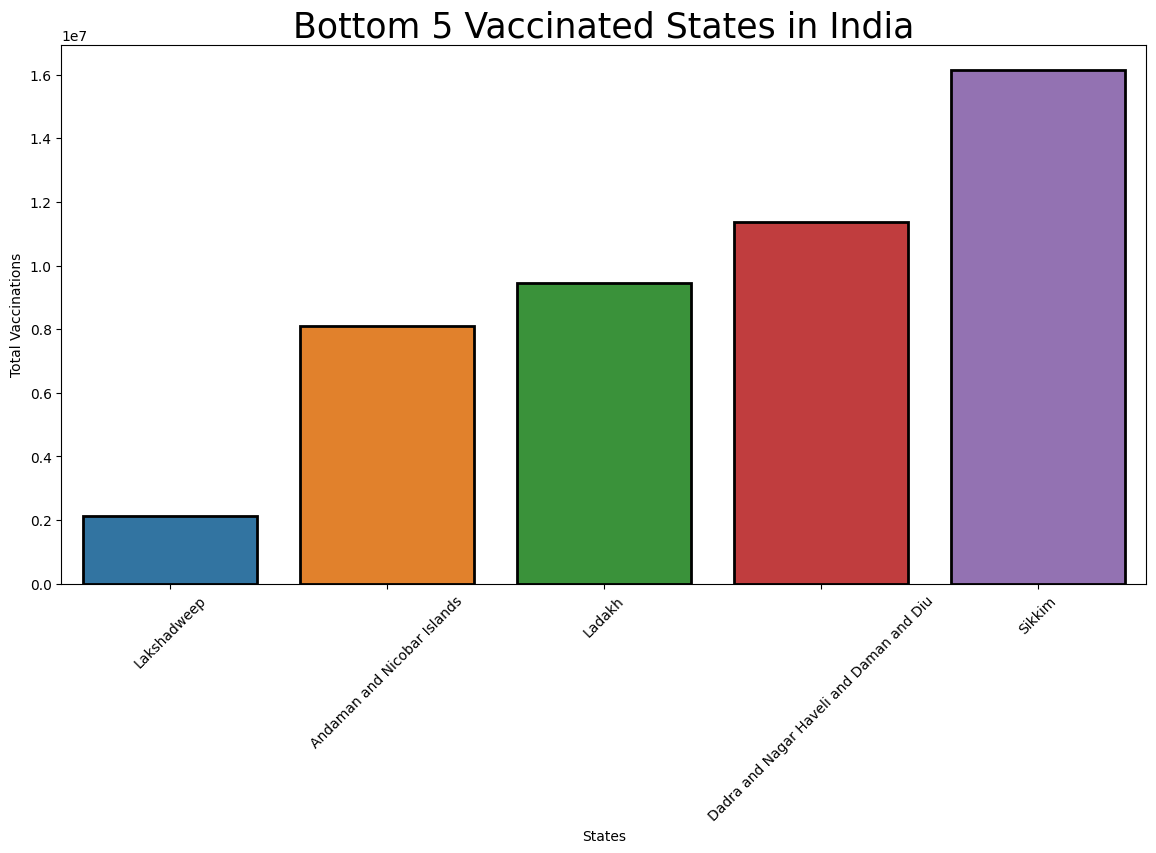

In [22]:
# Find the bottom 5 states with the lowest total vaccination
bottom_5_vac_states = vaccine.groupby('State')[['Total', 'Date']].sum().sort_values('Total', ascending=True).reset_index()

# Plot the bottom 5 vaccinated states
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_5_vac_states.head(5), x='State', y='Total', linewidth=2, edgecolor='black')
plt.title("Bottom 5 Vaccinated States in India", size=25)
plt.xlabel("States")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()